In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os

import pandas as pd

import vendee_globe as vg

import constants as c

from pandas.api.types import is_numeric_dtype

import matplotlib.dates as mdates

import ipywidgets as widgets

import matplotlib.pyplot as plt

In [5]:
# load and prep race data 
#data_folder = "data_2024"
#vg.update_data(data_folder)
#df_race = vg.load_race_data(data_folder)
#df_race = vg.data_prep_race(df_race, skipper_corrections=[('Kojiro Shiraishi', 'Kōjirō Shiraishi')])
#df_race.shape

In [6]:
df_race = pd.read_parquet(c.race_2024_path)

In [7]:
# load and prep web data
if os.path.exists(c.web_2024_path):
    df_web = pd.read_parquet(c.web_2024_path)
else:
    df_web = load_web_data_2024()
    df_web.to_parquet(c.web_2024_path)

df_web = vg.data_prep_web(df_web, skipper_corrections=[('Kojiro Shiraishi', 'Kōjirō Shiraishi')])
df_web.shape

(40, 17)

In [8]:
# load and prep wiki data 
if os.path.exists(c.wiki_2024_path):
    df_wiki = pd.read_parquet(c.wiki_2024_path)
else:
    df_wiki = vg.load_wiki_data_2024()
    df_wiki.to_parquet(c.wiki_2024_path)

df_wiki.shape

(40, 11)

In [9]:
# merge all 3 dataframes
df = pd.merge(df_race, df_web, on="skipper", how="left")
df = pd.merge(df, df_wiki, on="skipper", how="left")
df.shape

(18509, 76)

In [10]:
df.rename(columns={"foil_x": "foil"}, inplace=True)

/Users/datacraft/vendee_globe/src/vendee_globe/vendee_globe.py:468: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/Users/datacraft/vendee_globe/src/vendee_globe/vendee_globe.py:475: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



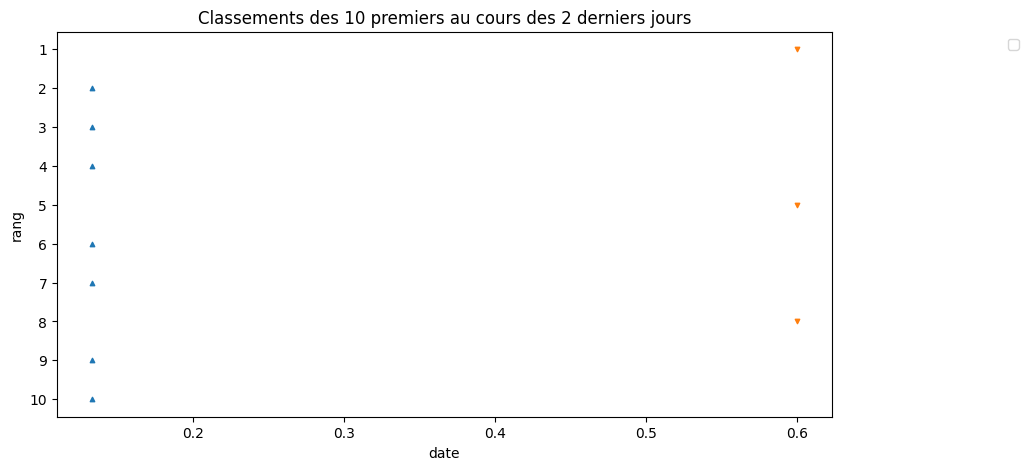

In [11]:
vg.show_ranking(df)

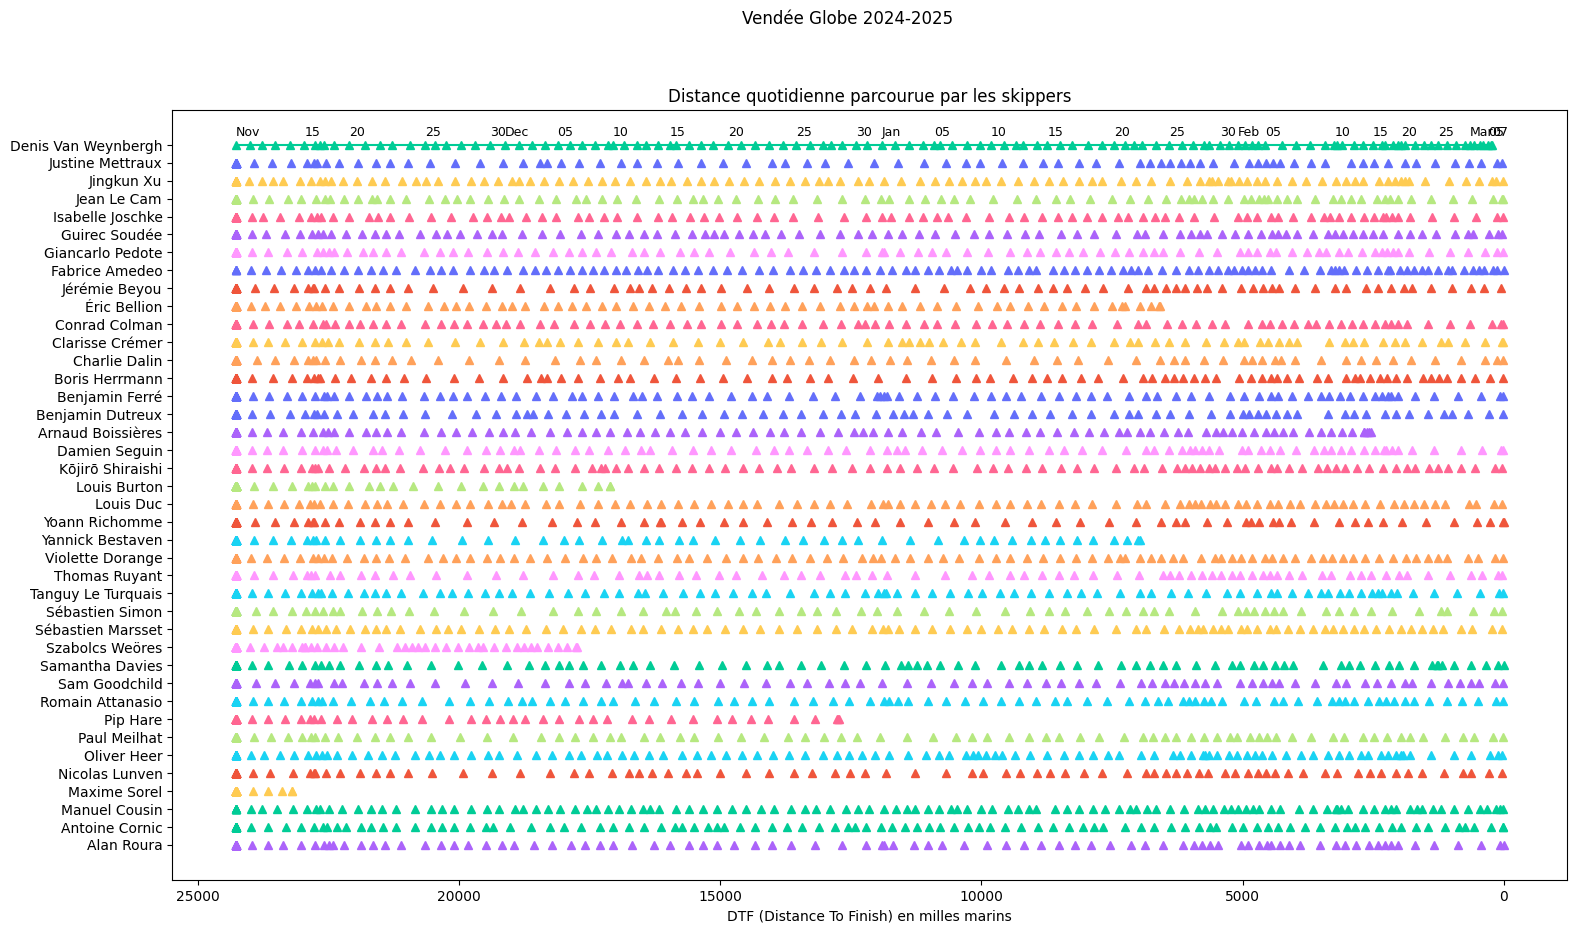

In [12]:
vg.show_race(df_race)

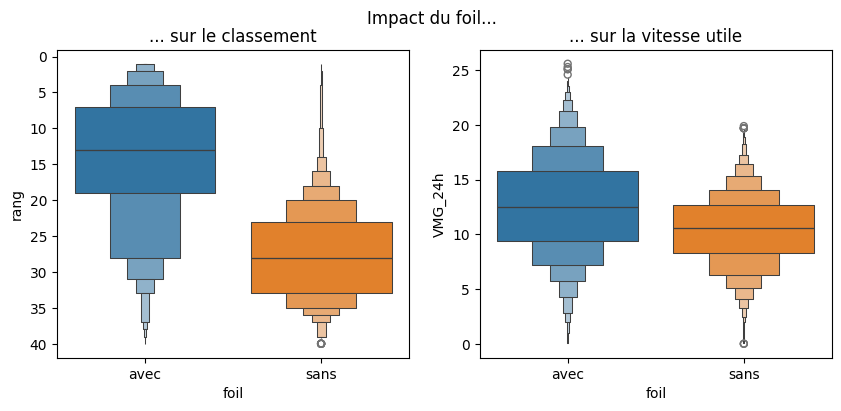

In [13]:
vg.impact_foil(df)

In [14]:
vg.interact(df)

interactive(children=(Dropdown(description='Colonne :', index=13, options=('rang', 'latitude', 'longitude', 'c…

In [15]:
vg.show_globe(df_race, 0, 10)

In [16]:
vg.show_speed(df_race)

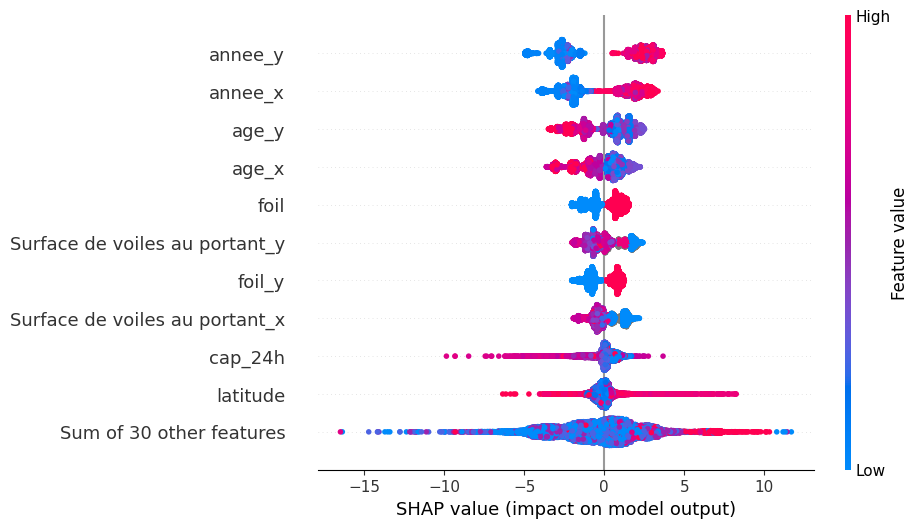

In [17]:
vg.show_shap_values(df)

In [ ]:
# colonnes numériques
num_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

# dropdown columns
column = widgets.Dropdown(options=num_cols,
                            value='VMG_24h',
                            description='Colonne :',
                           )
# dropdown aggfunc
aggfunc = widgets.Dropdown(options=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                             value='mean',
                             description='Agrégation :'
                            )

# radio button scale
scale = widgets.RadioButtons(options=['date', 'DTF'],
                             value='date',
                             description='Echelle :'
                            )

widgets.interact(
    vg.impact_foil_on_column,  
    df=widgets.fixed(df),      
    col=column,                
    aggfunc=aggfunc,           
    scale=scale                
);


interactive(children=(Dropdown(description='Colonne :', index=13, options=('rang', 'latitude', 'longitude', 'c…

<function vendee_globe.impact_foil_on_column(df, col, aggfunc, scale)>